<a href="https://colab.research.google.com/github/wdon021/From_Colab/blob/master/Assignment3_Extend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
# import scipy.misc as smp
from PIL import Image as im
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image, display
import pandas as pd
from scipy.ndimage.interpolation import rotate
from PIL import ImageDraw
import seaborn as sns
# import scipy.misc as smp
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Circle (randomly)
- default
- rotated blur circle
- different size

In [2]:
def create_circle_random(size = 28, radius = 5, color = 255):
  k = np.random.random_sample(size=2)
  col_random = np.int(16*k[0])+6
  row_random = np.int(16*k[1])+6
  data = np.zeros((size, size), dtype = np.uint8)
  ci,cj = row_random, col_random
  cr = radius
  # cr = round(np.round(radius+np.random.random()))
  # if(np.random.random()>0.5):
  #   cr = np.round(radius-np.random.random()*2)
  # if(((col_random+cr)>=size) | ((col_random-cr)<1)):
  #   print("col_random is out of bound")
  # if(((row_random+cr)>=size) | ((row_random-cr)<1)):
  #   print("row_random is out of bound")
  I,J = np.meshgrid(np.arange(data.shape[0]), np.arange(data.shape[1]))
  # basic formula for a circle (x - a)**2 + (y - b)**2 = r**2
  # calculate the radius
  dist = np.sqrt((I-ci)**2 +(J-cj)**2)
  # Assign value of any for those points within radius
  data[np.where(dist<cr)] = color
  if(np.random.random()>0.5):
    data = rotate(data, angle = np.random.random()*365, reshape=False)
  # img = im.fromarray(data)
  return data.flatten()

Rectangle
- default
- numpy.rotate

In [3]:
def rect_x_y(height, width):
  k = np.random.random_sample(size=2)
  start_x = np.int(20*k[0])
  start_y = np.int(20*k[1])
  rows = start_x + height 
  cols = start_y + width
  return start_x, start_y, rows, cols

In [4]:
def get_rect(x, y, width, height, angle):
  rect = np.array([(0, 0), (width, 0), (width, height), (0, height), (0, 0)])
  theta = (np.pi / 180.0) * angle
  R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
  offset = np.array([x, y])
  transformed_rect = np.dot(rect, R) + offset
  return transformed_rect

In [5]:
def rec_angle(size, x, y, width, height):
  angles = np.round(np.random.random()*365)
  data = np.zeros((size, size), dtype = np.uint8)
  img = im.fromarray(data)
  draw = ImageDraw.Draw(img)
  rect = get_rect(x = x, y = y, width = width, height = height, angle = angles)
  # rect1 = rect[0:4]
  draw.polygon([tuple(p) for p in rect], fill= 255)
  new_data = np.asarray(img)
  return new_data

In [6]:
def rect_random(size, color, width, height):
  data = np.zeros((size, size), dtype = np.uint8)
  # x1, y1, x2, y2 = 0, 0, 0, 0
  x1, y1, x2, y2 = rect_x_y(width, height)
  # print([x1, y1, x2, y2 ])
  while((x2 >=size)|(y2 >=size)):
    x1, y1, x2, y2 = rect_x_y(width, height)
  # print([x1, y1, x2, y2 ])
  data[x1:x2, y1:y2] = color
  data = np.rot90(data, k=np.round(np.random.random()*3))
  if(np.random.random()>0.5):
    data = rotate(data, angle = np.round(np.random.random()*365), reshape=False)
  # img = im.fromarray(data)
  # return data.flatten()
  return data

In [7]:
def combine_rect(sizes, width, height):
  data = np.zeros((sizes, sizes), dtype = np.uint8)
  if(np.random.random()<= 0.33333333333333333):
    data = rec_angle(size = sizes, x = 14+np.round(np.random.uniform(-1,1)*3), y =14+np.round(np.random.uniform(-1,1)*3), width = width, height = height)
  else:
    data = rect_random(sizes, 255, width = width, height = height)
  # img = im.fromarray(data)
  return data.flatten()

Triangle
- default
- np.rotate
- interploration.rotate
- draw.polygon

In [8]:
def triang_ang(sizes, recsize, x, y):
  data = np.zeros((sizes, sizes), dtype = np.uint8)
  img = im.fromarray(data)
  draw = ImageDraw.Draw(img)
  rect = get_rect(x = x, y = y, width = recsize, height = recsize, angle = round(np.random.random()*365))
  tri = rect[0:3]
  draw.polygon([tuple(p) for p in tri], fill= 255)
  new_data = np.asarray(img)
  return new_data

In [9]:
def triang_ran(size, recsize, color, diagonals = -1):
  data = np.zeros((size, size), dtype = np.uint8)
  # define a rectangle
  start_x, start_y, rows, cols = rect_x_y(recsize, recsize)
  # print([start_x, start_y, rows, cols])
  while((rows >=size)|(cols >=size)):
    start_x, start_y, rows, cols = rect_x_y(recsize, recsize)
  # print([start_x, start_y, rows, cols])
  data[start_x:rows, start_y:cols] = color
  # return lower triangle of rectangle
  if(np.random.random()>=0.5):
    data[start_x:rows, start_y:cols] = np.tril(data[start_x:rows, start_y:cols], diagonals)
  else:
    data[start_x:rows, start_y:cols] = np.triu(data[start_x:rows, start_y:cols], diagonals)
  data = np.rot90(data, k=np.floor(np.random.uniform(0,4)))
  if(np.random.random()<0.5):
    data = rotate(data, angle = np.round(np.random.random()*365), reshape=False)
  # img = im.fromarray(data)
  return data
  # return data.flatten()

In [10]:
def combine_trian(sizes, recsize):
  data = np.zeros((sizes, sizes), dtype = np.uint8)
  if(np.random.random()<= 0.33333333333333333):
    data = triang_ang(sizes =sizes, recsize= recsize, x = 14+np.round(np.random.uniform(-1,1)*3), y =14+np.round(np.random.uniform(-1,1)*3))
  else:
    data = triang_ran(sizes, recsize = recsize,color =  255)
  # img = im.fromarray(data)
  return data.flatten()

In [11]:
def random_shape():
  data = np.array([])
  name = ""
  prob = np.random.random_sample()
  # print(prob)
  if(prob<= 0.33333333333333333):
    data = create_circle_random(size = 33,radius= (5+np.round(np.random.uniform(-1,1))))
    name = "C"
  elif((prob> 0.33333333333333333) & (prob<= 0.66666666666666666)):
    data = combine_rect(sizes = 33, width = 4, height = 8)
    name = "R"
  else:
    data = combine_trian(sizes = 33, recsize = 8)
    name = 'T'
  return data, name


In [12]:
def random_generate(size, img_size):
  shape_vect = []
  shape_name = []
  for i in range(size):
    s_vect, s_name = random_shape()
    shape_vect.append(s_vect)
    shape_name.append(s_name)
  num_2d_shape = np.array(shape_vect).reshape(-1, img_size* img_size)
  return num_2d_shape, shape_name

##### Visulization of Extended

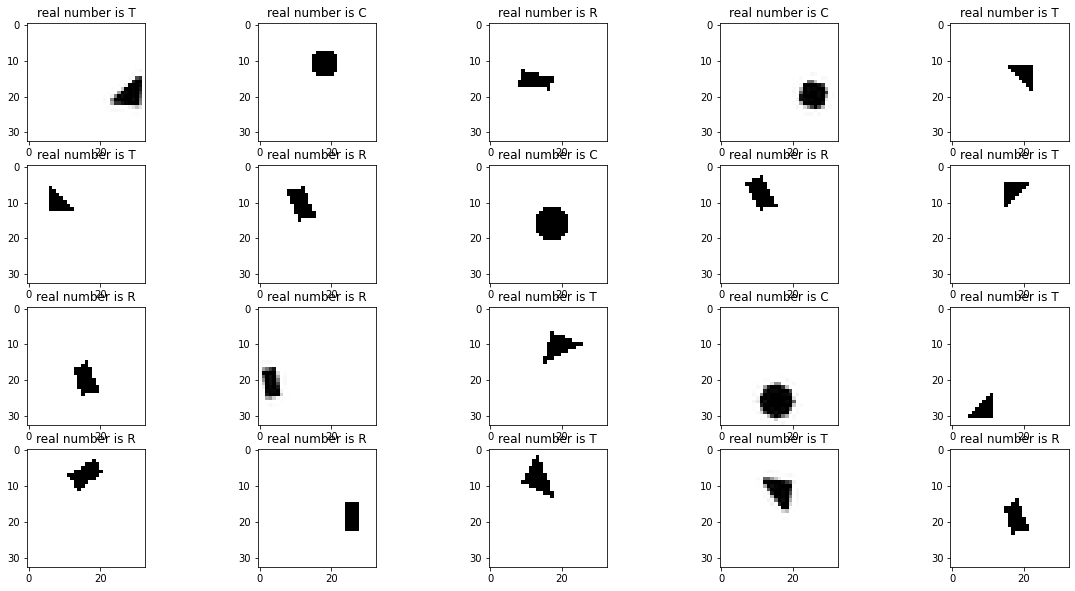

In [13]:
train_shape1, train_name1 =  random_generate(size = 20, img_size=33)
train_shape__ = train_shape1.reshape(train_shape1.shape[0], 33, 33)
fig, axis = plt.subplots(4, 5, figsize = (20, 10))
for i, ax in enumerate(axis.flat):
  ax.imshow(train_shape__[i], cmap = 'binary')
  # digit = y_train[i].argmax()
  ax.set(title = f"real number is {train_name1[i]}")

Idea behind Extend
- Blur image, different size, different orientation and distortion.
  - some looks like hand drawing or mouse drag drawing on the computer.
- We don't want model to trained on just few "identities" or features of objects.
- CNN has to trains the convolution kernels "intelligently".
- We want model to recognise and understand the "concept" of the triangle, rectangle and circle.
- We want CNN to recognize the distorted object as human eye can recognize them.


Generate dataset

In [14]:
train_shape, train_name =  random_generate(6000, img_size= 33)
test_shape, test_name =  random_generate(200, img_size= 33)

### Data Transform

In [15]:
# so the max = 1, min = 0
train_shape_N = train_shape/255.0
test_shape_N = test_shape/255.0

In [16]:
train_shape_R = train_shape_N.reshape(-1, 33, 33, 1)
test_shape_R = test_shape_N.reshape(-1, 33, 33, 1)

Label Encoding + One hot encoding the y

In [17]:
# Mapping 
shape = ['C', "T", "R"]
mapping = {}
for x in range(len(shape)):
  mapping[shape[x]] = x

In [18]:
# Integer representation
for x in range(len(train_name)):
  train_name[x] = mapping[train_name[x]]

In [19]:
for x in range(len(test_name)):
  test_name[x] = mapping[test_name[x]]

In [20]:
# one hot encoding
y = to_categorical(train_name)
y_actual = to_categorical(test_name)

split training and validation set

In [21]:
X_train, X_test, y_train, y_test = train_test_split(train_shape_R, y, test_size = 0.2, random_state = 0)

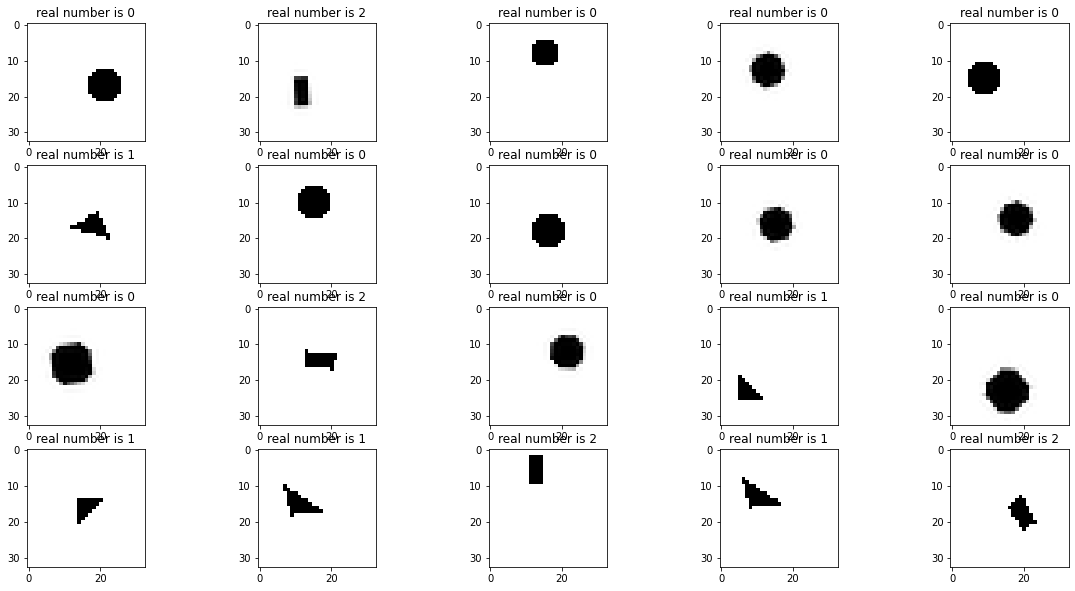

In [22]:
train_shape__ = X_train.reshape(X_train.shape[0], 33, 33)
fig, axis = plt.subplots(4, 5, figsize = (20, 10))
for i, ax in enumerate(axis.flat):
  ax.imshow(train_shape__[i], cmap = 'binary')
  digit = y_train[i].argmax()
  ax.set(title = f"real number is {digit}")

Train validation preparation

In [23]:
batch_sizes = 128
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=4000).batch(batch_sizes)
val_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
val_dataset = val_dataset.batch(batch_sizes)
optimizer = keras.optimizers.Adam(learning_rate=1e-3)

In [24]:
def loss_accuracy(train_loss, test_loss, train_accuracy, test_accuracy, title):
  fig, ax = plt.subplots(2, 1, figsize = (12, 10))
  plt.title(title)
  ax[0].plot(train_loss, color = 'b', label = "Training loss")
  ax[0].plot(test_loss, color = 'r', label = 'validation loss', axes = ax[0])
  legend = ax[0].legend(loc = 'best', shadow = True)
  ax[1].plot(train_accuracy, color = 'b', label = 'Training accuracy')
  ax[1].plot( test_accuracy, color = 'r', label = 'validation accuracy')
  ax[1].set_xlabel("Epoch")
  legend = ax[1].legend(loc = 'best', shadow = True)
  plt.show()

Define base model for CNN
- Same as the toy example
- we want to see if they are any difference

Fitting the model

In [ ]:
epochs = 20
inputs = keras.Input(shape = (33, 33, 1), name = 'shape')
x1 = Conv2D(filters = 20, kernel_size= (3), strides=(1, 1), padding = "valid", activation='relu', 
            kernel_initializer='glorot_uniform', use_bias=True, bias_initializer='glorot_uniform', kernel_regularizer=None)(inputs)
x2 = MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid')(x1)
x3 = Flatten()(x2)
x4 = layers.Dense(10, activation = 'relu', kernel_initializer='glorot_uniform', use_bias=True, bias_initializer="glorot_uniform", kernel_regularizer=None)(x3)
outputs = layers.Dense(3, activation = 'softmax')(x4)
model = keras.Model(inputs = inputs, outputs = outputs) 

train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []
for epoch in range(epochs):
  print("\n==============start of epoch %d" %(epoch,))
  for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
    with tf.GradientTape() as tape:
      logits = model(x_batch_train, training = True)
      # loss_value = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits= logits, labels = y))  
      loss_value = tf.reduce_mean(tf.keras.losses.categorical_crossentropy(y_batch_train, logits)) 
      # print(loss_value)
    grads = tape.gradient(loss_value, model.trainable_weights)  
    # print(grads)  
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y_batch_train, 1))
    train_acc = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    
    if step % 4 ==0:
      print(
          "Training loss (for one batch) at step %d: %.4f"
           %(step, float(loss_value))
      )
      print("Seen so far: %s samples" % ((step+1)*batch_sizes))

  for x_batch_val, y_batch_val in val_dataset:
    val_logits = model(x_batch_val, training = False)
  # val_loss_value = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits= val_logits, labels = y))
    val_loss_value = tf.reduce_mean(tf.keras.losses.categorical_crossentropy(y_batch_val, val_logits)) 
    val_correct_pred = tf.equal(tf.argmax(val_logits, 1), tf.argmax(y_batch_val, 1)) # if they are equal
    val_accuracy = tf.reduce_mean(tf.cast(val_correct_pred, tf.float32))
  print("validation acc: %.4f" %(float(val_accuracy),))
  train_loss.append(loss_value)
  test_loss.append(val_loss_value)
  train_accuracy.append(train_acc)
  test_accuracy.append(val_accuracy)

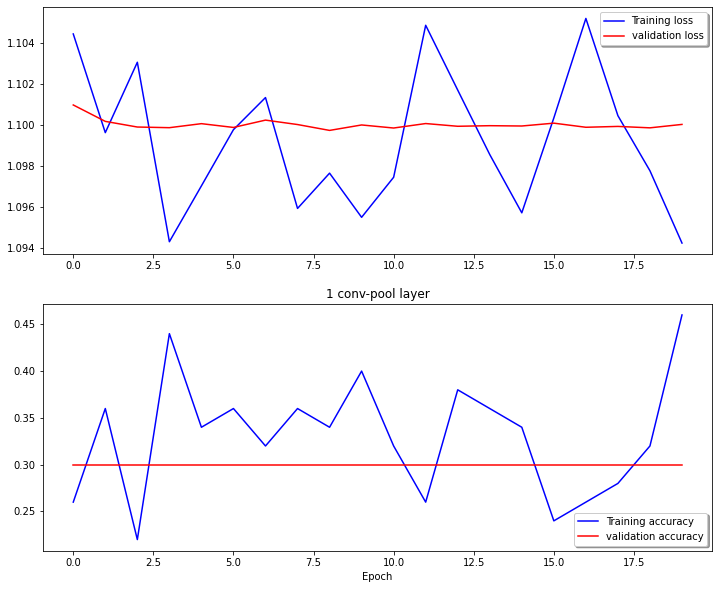

In [ ]:
loss_accuracy(train_loss, test_loss, train_accuracy, test_accuracy, title = '1 conv-pool layer')

In [ ]:
epochs = 20
inputs = keras.Input(shape = (33, 33, 1), name = 'shape')
x1 = Conv2D(filters = 20, kernel_size= (3), strides=(1, 1), padding = "valid", activation='relu', 
            kernel_initializer='glorot_uniform', use_bias=True, bias_initializer='glorot_uniform', kernel_regularizer=None)(inputs)
x2 = MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid')(x1)
x11 = Conv2D(filters = 20, kernel_size= (3), strides=(1, 1), padding = "valid", activation='relu', 
            kernel_initializer='glorot_uniform', use_bias=True, bias_initializer='glorot_uniform', kernel_regularizer=None)(x2)
x22 = MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid')(x11)
x3 = Flatten()(x22)
x4 = layers.Dense(10, activation = 'relu', kernel_initializer='glorot_uniform', use_bias=True, bias_initializer="glorot_uniform", kernel_regularizer=None)(x3)
outputs = layers.Dense(3, activation = 'softmax')(x4)
model = keras.Model(inputs = inputs, outputs = outputs)

train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []
for epoch in range(epochs):
  print("\n==============start of epoch %d" %(epoch,))
  for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
    with tf.GradientTape() as tape:
      logits = model(x_batch_train, training = True)
      # loss_value = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits= logits, labels = y))  
      loss_value = tf.reduce_mean(tf.keras.losses.categorical_crossentropy(y_batch_train, logits)) 
      # print(loss_value)
    grads = tape.gradient(loss_value, model.trainable_weights)  
    # print(grads)  
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y_batch_train, 1))
    train_acc = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    
    if step % 4 ==0:
      print(
          "Training loss (for one batch) at step %d: %.4f"
           %(step, float(loss_value))
      )
      print("Seen so far: %s samples" % ((step+1)*batch_sizes))

  for x_batch_val, y_batch_val in val_dataset:
    val_logits = model(x_batch_val, training = False)
  # val_loss_value = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits= val_logits, labels = y))
    val_loss_value = tf.reduce_mean(tf.keras.losses.categorical_crossentropy(y_batch_val, val_logits)) 
    val_correct_pred = tf.equal(tf.argmax(val_logits, 1), tf.argmax(y_batch_val, 1)) # if they are equal
    val_accuracy = tf.reduce_mean(tf.cast(val_correct_pred, tf.float32))
  print("validation acc: %.4f" %(float(val_accuracy),))
  train_loss.append(loss_value)
  test_loss.append(val_loss_value)
  train_accuracy.append(train_acc)
  test_accuracy.append(val_accuracy)


==============start of epoch 0
Training loss (for one batch) at step 0: 1.1021
Seen so far: 50 samples
Training loss (for one batch) at step 4: 1.1019
Seen so far: 250 samples
Training loss (for one batch) at step 8: 1.0977
Seen so far: 450 samples
Training loss (for one batch) at step 12: 1.0968
Seen so far: 650 samples
Training loss (for one batch) at step 16: 1.0979
Seen so far: 850 samples
Training loss (for one batch) at step 20: 1.0991
Seen so far: 1050 samples
Training loss (for one batch) at step 24: 1.0971
Seen so far: 1250 samples
Training loss (for one batch) at step 28: 1.0901
Seen so far: 1450 samples
Training loss (for one batch) at step 32: 1.1007
Seen so far: 1650 samples
Training loss (for one batch) at step 36: 1.0968
Seen so far: 1850 samples
Training loss (for one batch) at step 40: 1.0868
Seen so far: 2050 samples
Training loss (for one batch) at step 44: 1.0859
Seen so far: 2250 samples
Training loss (for one batch) at step 48: 1.0886
Seen so far: 2450 samples
Tr

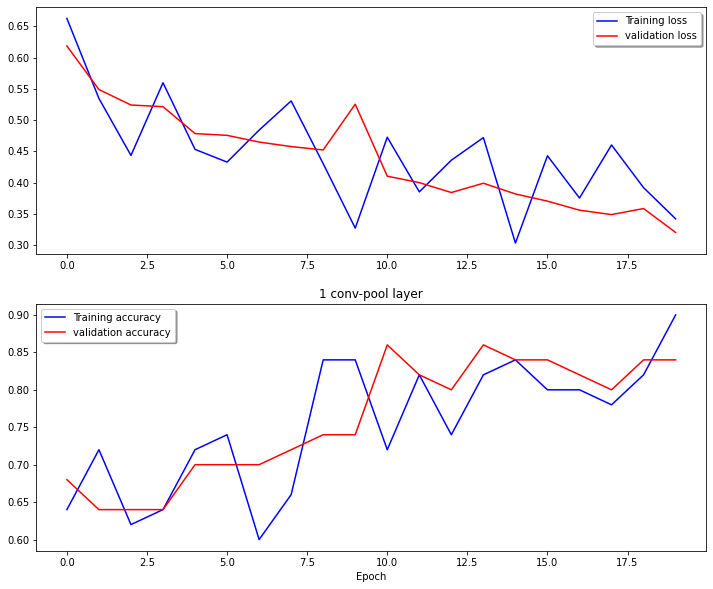

In [ ]:
loss_accuracy(train_loss, test_loss, train_accuracy, test_accuracy, title = '1 conv-pool layer')

### comparison
- First baseline model has structure of 1 layer of conv-pool layer with kernel size = 3*3 and 20 channels of convolution kernels.
- Second model has 2 layers of conv-pool layer, with the same kernel size and channels of conv-kernel like baseline model.
- The training and accuracy plots of first model indicates that, "shallow" Convolution neural network is not trainable in this extended question.
- The training and curracy plots of second model indicates that, the dataset requires "deeper" architecture of convolution neural network, in order to train the model properly.
- So I will implement ResNet.

ResNet
- So I will use very basic setting as the basemodel
- 20 epochs

In [29]:
from keras import applications
from keras.layers import GlobalAveragePooling2D
from keras.models import Sequential,Model,load_model

In [34]:
base_model = applications.resnet50.ResNet50(weights=None,include_top=False,  input_shape=(33, 33, 1))

In [35]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
# x = layers.Dense(10, activation = 'relu', kernel_initializer='glorot_uniform', use_bias=True, bias_initializer="glorot_uniform", kernel_regularizer=None)(x)
predictions = Dense(3, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)

In [36]:
epochs = 20
batch_sizes = 64
X_train, X_test, y_train, y_test = train_test_split(train_shape_R, y, test_size = 0.2, shuffle = True)
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=5000).batch(batch_sizes)
val_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
val_dataset = val_dataset.batch(batch_sizes)
optimizer = keras.optimizers.Adam(learning_rate=1e-3)


train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []
for epoch in range(epochs):
  print("\n==============start of epoch %d" %(epoch,))
  for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
    with tf.GradientTape() as tape:
      logits = model(x_batch_train, training = True)
      # loss_value = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits= logits, labels = y))  
      loss_value = tf.reduce_mean(tf.keras.losses.categorical_crossentropy(y_batch_train, logits)) 
      # print(loss_value)
    grads = tape.gradient(loss_value, model.trainable_weights)  
    # print(grads)  
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y_batch_train, 1))
    train_acc = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    
    if step % 4 ==0:
      print(
          "Training loss (for one batch) at step %d: %.4f"
           %(step, float(loss_value))
      )
      print("Seen so far: %s samples" % ((step+1)*batch_sizes))

  for x_batch_val, y_batch_val in val_dataset:
    val_logits = model(x_batch_val, training = False)
  # val_loss_value = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits= val_logits, labels = y))
    val_loss_value = tf.reduce_mean(tf.keras.losses.categorical_crossentropy(y_batch_val, val_logits)) 
    val_correct_pred = tf.equal(tf.argmax(val_logits, 1), tf.argmax(y_batch_val, 1)) # if they are equal
    val_accuracy = tf.reduce_mean(tf.cast(val_correct_pred, tf.float32))
  print("validation acc: %.4f" %(float(val_accuracy),))
  train_loss.append(loss_value)
  test_loss.append(val_loss_value)
  train_accuracy.append(train_acc)
  test_accuracy.append(val_accuracy)


==============start of epoch 0
Training loss (for one batch) at step 0: 1.9662
Seen so far: 64 samples
Training loss (for one batch) at step 4: 2.4195
Seen so far: 320 samples
Training loss (for one batch) at step 8: 1.5111
Seen so far: 576 samples
Training loss (for one batch) at step 12: 1.3703
Seen so far: 832 samples
Training loss (for one batch) at step 16: 1.3830
Seen so far: 1088 samples
Training loss (for one batch) at step 20: 1.2133
Seen so far: 1344 samples
Training loss (for one batch) at step 24: 0.6368
Seen so far: 1600 samples
Training loss (for one batch) at step 28: 0.7429
Seen so far: 1856 samples
Training loss (for one batch) at step 32: 0.5687
Seen so far: 2112 samples
Training loss (for one batch) at step 36: 1.1885
Seen so far: 2368 samples
Training loss (for one batch) at step 40: 0.6015
Seen so far: 2624 samples
Training loss (for one batch) at step 44: 0.6520
Seen so far: 2880 samples
Training loss (for one batch) at step 48: 0.5663
Seen so far: 3136 samples
T

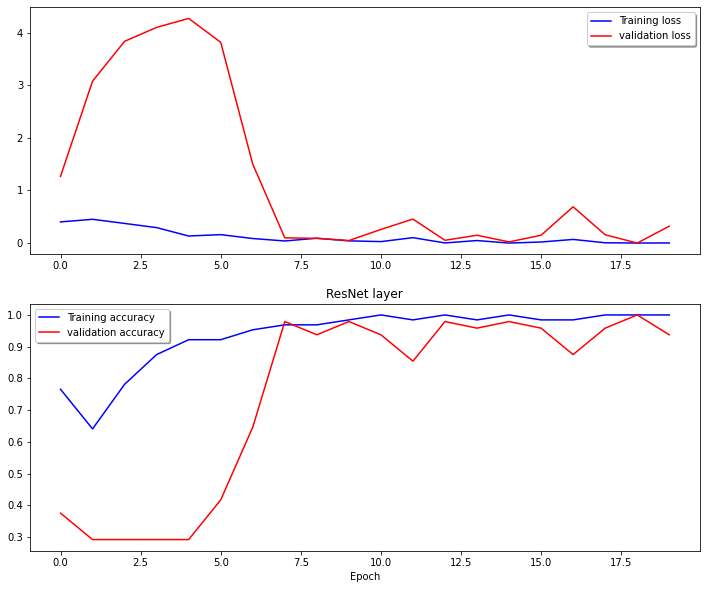

In [37]:
loss_accuracy(train_loss, test_loss, train_accuracy, test_accuracy, title = 'ResNet layer')

In [38]:
model.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 33, 33, 1)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 39, 39, 1)    0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 17, 17, 64)   3200        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 17, 17, 64)   256         conv1_conv[0][0]                 
_______________________________________________________________________________________

Test ResNet with test set

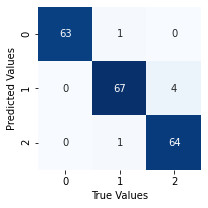

In [39]:
fig = plt.figure(figsize=(3, 3))
y_pred = model.predict(test_shape_R)
Y_pred = np.argmax(y_pred, 1)
Y_test = np.argmax(y_actual, 1)

mat = confusion_matrix(Y_test, Y_pred)

sns.heatmap(mat.T, square=True, annot=True, cbar= False, cmap=plt.cm.Blues)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

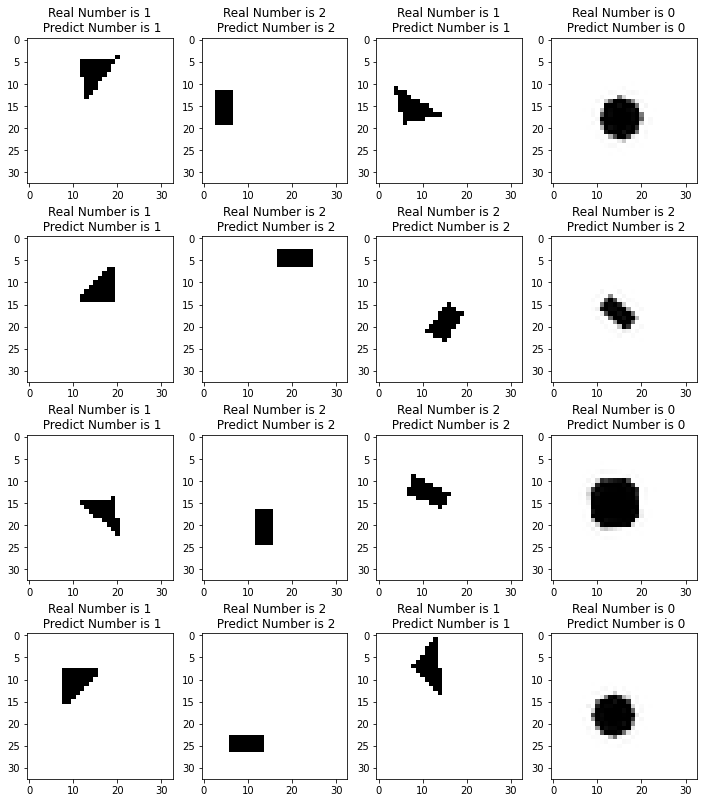

In [40]:
y_pred = model.predict(test_shape_R)
X_test__ = test_shape_R.reshape(test_shape_R.shape[0], 33, 33)

fig, axis = plt.subplots(4, 4, figsize = (12, 14))
for i, ax in enumerate(axis.flat):
  ax.imshow(X_test__[i], cmap = 'binary')
  ax.set(title = f'Real Number is {y_actual[i].argmax()}\n Predict Number is {y_pred[i].argmax()}')

ResNet breakdown

In [ ]:

from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

#### The identity block
url{https://towardsdatascience.com/understanding-and-coding-a-resnet-in-keras-446d7ff84d33} is what I learnt from

The identity block is the standard block used in ResNets, and corresponds to the case where the input activation (say $a^{[l]}$) has the same dimension as the output activation (say $a^{[l+2]}$).

In [ ]:
def identity_block(X, f, filters, stage, block):
  # defining name basis
  conv_name_base = 'res' + str(stage) + block +'_branch'
  bn_name_base = 'bn' + str(stage) +block + '_branch'

  # retrive Filters
  F1, F2, F3 = filters

  # Save the input value, need this to add back to the main path later.
  X_shortcut = X

  # First component of main path, use 1*1 kernel to reduce the channel
  X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name = conv_name_base+'2a', kernel_initializer=glorot_uniform(seed=0))(X)
  X = BatchNormalization(axis=3, name=bn_name_base+'2a')(X)
  X = Activation('relu')(X)

  # second component of main path
  X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name = conv_name_base+'2b', kernel_initializer=glorot_uniform(seed=0))(X)
  X = BatchNormalization(axis=3, name=bn_name_base +'2b')(X)
  X = Activation('relu')(X)

  # Third component of main path
  X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name = conv_name_base+'2c', kernel_initializer=glorot_uniform(seed=0))(X)
  X = BatchNormalization(axis=3, name=bn_name_base+'2c')(X)

  # add X thourhg shortcut!! Residual
  X = Add()([X, X_shortcut])
  X = Activation('relu')(X)

  return X

#### The convolutional block
- The difference with the identity block is that there is a CONV2D layer in the shortcut path:

In [ ]:
def convolutional_block(X, f, filters, stage, block, s=2):
  # defininf name basis
  """
  x - input tensor
  f - integer, size of middle conv's window for the main path
  filters - list integers, defining the number of filters in the conv layers of the main path
  stage - integer, name the layers
  block -string- name the layer
  s - integer, stride
  """
  conv_name_base = 'res' + str(stage) + block +'_branch'
  bn_name_base = 'bn' + str(stage) + block + '_branch'

  # Retrieve Filters
  F1, F2, F3 = filters

  # Save the input value
  X_shortcut = X

  #### Main Path ####
  # First component of main path
  X = Conv2D(F1, kernel_size=(1,1), strides=(s, s), name = conv_name_base +'2a', kernel_initializer= glorot_uniform(seed=0))(X)
  X = BatchNormalization(axis=3, name=bn_name_base+'2a')(X)
  X = Activation('relu')(X)

  # second component of main path
  X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name = conv_name_base+'2b', kernel_initializer=glorot_uniform(seed=0))(X)
  X = BatchNormalization(axis=3, name=bn_name_base+'2b')(X)
  X = Activation('relu')(X)

  # Third component of main path

  X = Conv2D(filters= F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name = conv_name_base+'2c', kernel_initializer=glorot_uniform(seed=0))(X)
  X = BatchNormalization(axis=3, name=bn_name_base+'2c')(X)

  ## shortcut path##

  X_shortcut = Conv2D(filters=F3, kernel_size=(1,1), strides=(s, s), padding='valid', name = conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
  X_shortcut = BatchNormalization(axis=3, name = bn_name_base +'1')(X_shortcut)

  # Final step add shortcut value to main path and pass it through a RELU activation
  X = Add()([X, X_shortcut])
  X = Activation('relu')(X)

  return X

Building ResNet model(50 layers)

In [ ]:
input_shape = (33, 33, 1)
classes = 3
X_input = Input(input_shape)

X = ZeroPadding2D((3, 3))(X_input)

# stage 1
X = Conv2D(filters=64, kernel_size=(7, 7), strides=(2, 2), name = 'conv1', kernel_initializer=glorot_uniform(seed=0))(X)
X = BatchNormalization(axis=3, name='bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3, 3), strides=(2, 2))(X)

# stage 2
X = convolutional_block(X, f = 3, filters=[64, 64, 256], stage=2, block='a', s=1)
X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
X = identity_block(X, f=3, filters=[64, 64, 256], stage=2, block='c')

# stage 3
X = convolutional_block(X, f = 3, filters = [128, 128, 512], stage = 3, block ='a', s=2)
X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

# Stage 4
X = convolutional_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block='a', s = 2)
X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')
X = AveragePooling2D((2, 2), name = 'avg_pool')(X)

X= Flatten()(X)
# X = layers.Dense(10, activation = 'relu', kernel_initializer='glorot_uniform', use_bias=True, bias_initializer="glorot_uniform", kernel_regularizer=None)(X)
predictions = Dense(3, activation= 'softmax')(X)
model = Model(inputs = X_input, outputs = predictions, name = 'ResNet_naive')

In [ ]:
epochs = 20

batch_sizes = 64
X_train, X_test, y_train, y_test = train_test_split(train_shape_R, y, test_size = 0.2, shuffle = True)
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=5000).batch(batch_sizes)
val_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
val_dataset = val_dataset.batch(batch_sizes)
optimizer = keras.optimizers.Adam(learning_rate=1e-3)

train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

for epoch in range(epochs):
  print("\n==============start of epoch %d" %(epoch,))
  for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
    with tf.GradientTape() as tape:
      logits = model(x_batch_train, training = True)
      # loss_value = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits= logits, labels = y))  
      loss_value = tf.reduce_mean(tf.keras.losses.categorical_crossentropy(y_batch_train, logits)) 
      # print(loss_value)
    grads = tape.gradient(loss_value, model.trainable_weights)  
    # print(grads)  
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y_batch_train, 1))
    train_acc = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    
    if step % 4 ==0:
      print(
          "Training loss (for one batch) at step %d: %.4f"
           %(step, float(loss_value))
      )
      print("Seen so far: %s samples" % ((step+1)*batch_sizes))

  for x_batch_val, y_batch_val in val_dataset:
    val_logits = model(x_batch_val, training = False)
  # val_loss_value = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits= val_logits, labels = y))
    val_loss_value = tf.reduce_mean(tf.keras.losses.categorical_crossentropy(y_batch_val, val_logits)) 
    val_correct_pred = tf.equal(tf.argmax(val_logits, 1), tf.argmax(y_batch_val, 1)) # if they are equal
    val_accuracy = tf.reduce_mean(tf.cast(val_correct_pred, tf.float32))
  print("validation acc: %.4f" %(float(val_accuracy),))
  train_loss.append(loss_value)
  test_loss.append(val_loss_value)
  train_accuracy.append(train_acc)
  test_accuracy.append(val_accuracy)


==============start of epoch 0
Training loss (for one batch) at step 0: 2.4596
Seen so far: 64 samples
Training loss (for one batch) at step 4: 2.9057
Seen so far: 320 samples
Training loss (for one batch) at step 8: 1.9141
Seen so far: 576 samples
Training loss (for one batch) at step 12: 0.9498
Seen so far: 832 samples
Training loss (for one batch) at step 16: 0.9305
Seen so far: 1088 samples
Training loss (for one batch) at step 20: 1.2997
Seen so far: 1344 samples
Training loss (for one batch) at step 24: 1.0378
Seen so far: 1600 samples
Training loss (for one batch) at step 28: 0.8181
Seen so far: 1856 samples
Training loss (for one batch) at step 32: 0.6259
Seen so far: 2112 samples
Training loss (for one batch) at step 36: 0.7135
Seen so far: 2368 samples
Training loss (for one batch) at step 40: 0.7640
Seen so far: 2624 samples
Training loss (for one batch) at step 44: 0.9498
Seen so far: 2880 samples
Training loss (for one batch) at step 48: 0.7883
Seen so far: 3136 samples
T

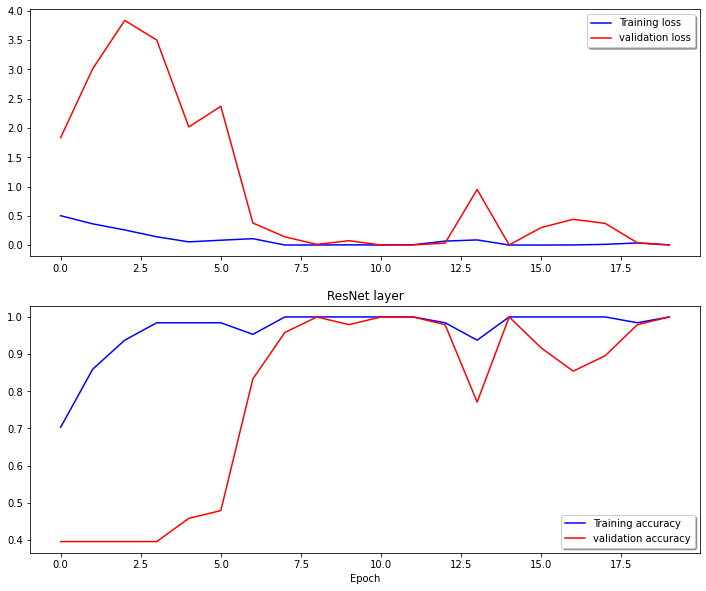

In [ ]:
loss_accuracy(train_loss, test_loss, train_accuracy, test_accuracy, title = 'ResNet layer')

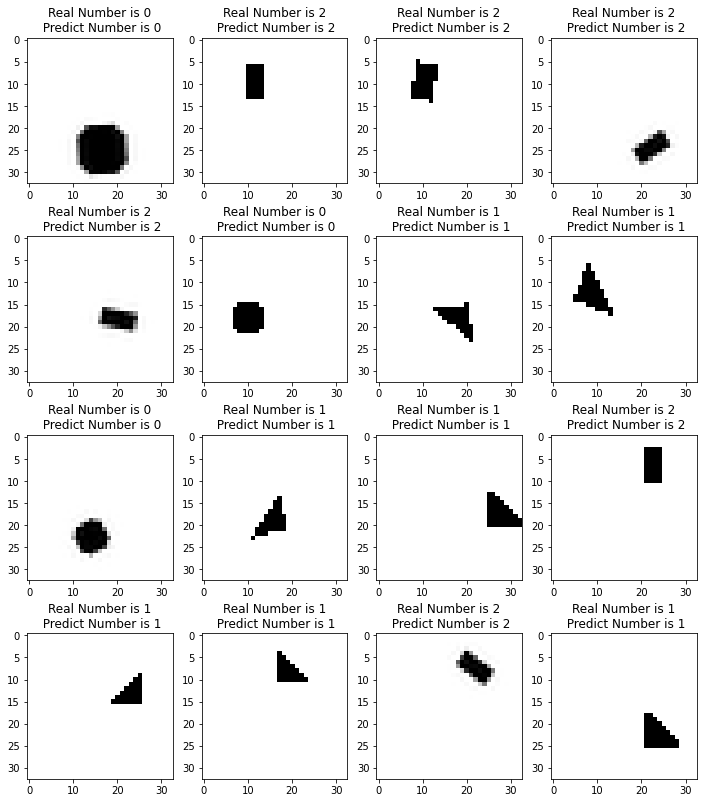

In [ ]:
y_pred = model.predict(test_shape_R)
X_test__ = test_shape_R.reshape(test_shape_R.shape[0], 33, 33)

fig, axis = plt.subplots(4, 4, figsize = (12, 14))
for i, ax in enumerate(axis.flat):
  ax.imshow(X_test__[i], cmap = 'binary')
  ax.set(title = f'Real Number is {y_actual[i].argmax()}\n Predict Number is {y_pred[i].argmax()}')